# Overfitting vs Underfitting and How To Address Them

## Bias vs Variance
- Bias: 
    - It's the model's tendency to make errors due to simplifying assumption
    - High bias means the model is too simplistic and cannot capture the true patterns and nuances in the data
    - High bias = underfitting
    - e.g. trying to fit a straight line into a curved relationship. Linear regression applied to a non-linear problem
- Variance:
    - It's the model's sensitivity to small fluctuations or nuances in the training data (overcomplicating assumptions)
    - High variance means the model is overly complex and fits the training data too closely
    - High variance = overfitting
    - a decision tree model with too many branches

![vb](https://miro.medium.com/v2/resize:fit:1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

![fitting.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

## Summary for Overfitting vs Underfitting
- Overfitting: high variance and low bias
- Underfitting: low variance and high bias

### Addressing Overfitting and Underfitting
- For overfitting: simplify the model complexity by:
    - using fewer features
    - reducing the complexity of model parameters (hyperparameter turning)
    - applying regularization
- For underfitting: increase the complexity by:
    - adding more feature (feature engineering)
    - increase the amount of training data where you have more diverse instances 


## Detecting and Preventing Overfitting or Underfitting

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#we'll be using decision tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

In [59]:
#create X and y variables using make class
X, y = make_classification(n_samples=90000, #9k data points
                           n_features= 18, #total num of features for prediction
                           n_informative=4, #num of features that will be useful for the ML model
                           n_redundant=12, #num of features that may cause noise
                           random_state=2
                           )

In [60]:
X[:20]

array([[-9.15146168e-01, -9.58234234e-01,  4.00350053e+00,
        -1.16957962e+00,  1.31235427e+00,  1.16720558e+00,
         1.48916254e+00,  7.91533533e-01,  6.19137870e-01,
         3.96226832e+00, -2.93145850e+00, -4.31151815e+00,
        -3.54987001e+00, -9.97183224e-01,  2.26712525e-01,
         1.59749733e+00, -1.11512993e+00,  3.60155215e+00],
       [-1.62965867e+00,  4.27837121e-01,  1.07239615e+00,
        -1.32112143e+00, -1.64276464e+00,  1.98390014e+00,
        -2.05344082e+00,  1.88719978e-01, -3.91699962e-01,
         2.37566500e+00,  8.73834744e-01, -8.51895349e-01,
         5.45221497e-03, -2.78281316e-01,  1.26717378e+00,
         1.79364219e+00, -1.28329202e+00,  1.18617020e+00],
       [ 1.72400715e+00, -1.55748830e+00,  1.50309880e+00,
        -1.81028793e+00, -8.37511597e-01,  6.80123203e-01,
        -1.65342806e-01, -5.84031905e-01,  7.41828349e-01,
        -2.41962498e+00, -2.60131029e+00, -3.60856067e-01,
        -5.61256701e-01, -2.57619349e-01,  2.09021669e

In [61]:
# optional step - for data display  only
import numpy as np
import pandas as pd
#show the data in a tablular format
pd.DataFrame(np.hstack((X,y.reshape(-1,1)))) #join X and y (convert y into a vertical array col)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.915146,-0.958234,4.003501,-1.169580,1.312354,1.167206,1.489163,0.791534,0.619138,3.962268,-2.931458,-4.311518,-3.549870,-0.997183,0.226713,1.597497,-1.115130,3.601552,1.0
1,-1.629659,0.427837,1.072396,-1.321121,-1.642765,1.983900,-2.053441,0.188720,-0.391700,2.375665,0.873835,-0.851895,0.005452,-0.278281,1.267174,1.793642,-1.283292,1.186170,0.0
2,1.724007,-1.557488,1.503099,-1.810288,-0.837512,0.680123,-0.165343,-0.584032,0.741828,-2.419625,-2.601310,-0.360856,-0.561257,-0.257619,0.209022,-0.499038,1.670271,1.146012,0.0
3,1.493180,-0.615408,2.746625,-1.571029,-0.657131,1.443767,-2.299731,-0.153087,-0.712489,1.154912,-2.803760,-4.039223,-1.786585,-2.258854,-0.886571,0.485662,-2.027974,-0.133158,1.0
4,0.278379,-0.717891,1.239263,0.202299,1.590907,-0.589205,2.134275,0.303407,0.977623,0.548217,-1.753008,-1.302399,-1.648625,-0.101723,0.529778,-0.200561,0.427007,1.312180,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,2.056433,-1.889946,2.001512,0.764780,3.686820,-2.106518,4.864307,0.284488,0.153409,-0.957061,-4.423295,-2.195691,-3.182606,-0.273270,-0.946359,-1.605704,1.701569,1.685504,0.0
89996,-0.834247,-0.443990,1.824342,-0.167188,1.237163,0.191257,1.694280,0.565917,1.574625,2.238270,-1.262308,-1.859922,-1.912773,-0.135584,1.191608,0.770665,-0.273578,2.167490,1.0
89997,1.787583,-1.664080,1.681517,-1.481538,-0.143162,0.290815,0.639970,-0.450012,-0.689668,-2.186482,-2.984734,-0.707185,-1.033390,-0.269881,-0.007127,-0.648711,1.711200,1.335945,0.0
89998,0.898946,-0.819804,0.749571,0.393158,1.631513,-0.996701,2.211275,0.112658,-0.566082,-0.552221,-1.853721,-0.778746,-1.304564,-0.035058,-0.543048,-0.761582,0.856409,0.704378,0.0


- above is the dataset we generated
- col 18 is the target (y) and it's binary class

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

### Deploy A Decision Tree Algorithm

- it's a popular ML algo that works on both classification and regression problems:
    - classification: `DecisionTreeClassifier()`
    - regression: `DecisionTreeRegressor()`

![dt2](https://eloquentarduino.github.io/wp-content/uploads/2020/08/DecisionTree.png)

![dt](https://miro.medium.com/v2/resize:fit:1358/0*LE5dtoUiXduhrad1)

**Objective** 
- We'll be increasing the complexity of the tree branches gradually and observe the accuracy.
- increasing complexity -> moving closer to overfitting or capture the nuances and noise in the data
- increasing complexity for decision trees can be done in multiple ways, we'll be using `max_depth` which adjusts the number of layers in the decision tree

to achieve this simulation exercise:
- define a range of `max_depth` e.g. 1 to 10
- deploy the model with `max_depth = i`
- Fit the model and create train_yhat (predicted values from algo based on training data)
- Get the accuracy score for train
- do the same steps for test
- print and plot the output

In [63]:
# create 2 empty lists 1 for test and another for train scores
train_scores, test_scores = list(), list()

define the range of my values for `max_depth`

In [64]:
par_values = list(range(1,21))
par_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [65]:
# let's build a loop that iterates for the steps mentioned above

for i in par_values:
    #define the model
    model = DecisionTreeClassifier(max_depth=i)

    #train or fit the model
    model.fit(X_train, y_train)

    #get the predicted values for training dataset
    y_hat_train = model.predict(X_train)
    #get the accuracy
    train_accu = accuracy_score(y_train, y_hat_train) #actual vs predicted values

    #do the same for test dataset
    y_hat_test = model.predict(X_test)
    test_accu = accuracy_score(y_test, y_hat_test) #actual vs predicted values

    #capture the accuracy results and append them into our blank lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #print a report of the results
    print(f'Iteration with max_depth={i} \t| train score:{train_accu:.3f} \t| test score:{test_accu:.3f}')


Iteration with max_depth=1 	| train score:0.726 	| test score:0.731
Iteration with max_depth=2 	| train score:0.745 	| test score:0.747
Iteration with max_depth=3 	| train score:0.778 	| test score:0.780
Iteration with max_depth=4 	| train score:0.788 	| test score:0.790
Iteration with max_depth=5 	| train score:0.792 	| test score:0.793
Iteration with max_depth=6 	| train score:0.826 	| test score:0.825
Iteration with max_depth=7 	| train score:0.844 	| test score:0.838
Iteration with max_depth=8 	| train score:0.857 	| test score:0.850
Iteration with max_depth=9 	| train score:0.866 	| test score:0.856
Iteration with max_depth=10 	| train score:0.876 	| test score:0.859
Iteration with max_depth=11 	| train score:0.884 	| test score:0.859
Iteration with max_depth=12 	| train score:0.894 	| test score:0.858
Iteration with max_depth=13 	| train score:0.904 	| test score:0.854
Iteration with max_depth=14 	| train score:0.914 	| test score:0.852
Iteration with max_depth=15 	| train score:

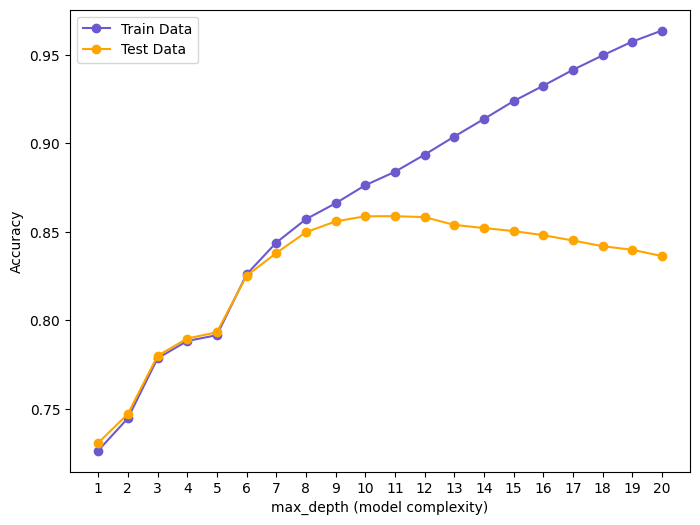

In [74]:
# plot the results
plt.figure(figsize=(8,6))
plt.plot(par_values, train_scores, '-o', label='Train Data', color='slateblue')
plt.plot(par_values, test_scores, '-o', label='Test Data', color='orange')
plt.xticks(par_values)
plt.ylabel('Accuracy')
plt.xlabel('max_depth (model complexity)')
plt.legend()